In [1]:
# Functions to save and load variables/data

def pickle_save(name, path, data, verbose=True):
    if not os.path.exists(path):
        os.makedirs(path)
    full_name = (os.path.join(path,name+ '.npy'))


    with open(full_name, 'wb') as f2:
        pickle.dump(data, f2)
    if verbose:
        print('saved at : ',full_name)

def pickle_load(name, path, verbose=True):
    #if not os.path.exists(path):
    #    os.makedirs(path)
    full_name= (os.path.join(path,name+ '.npy'))

    with open(full_name, 'r') as f:
        data=pickle.load(f)

    if verbose:
        print('loaded from : ',full_name)
    return data

In [2]:
def plot_profile(lat, depth, field, title_fig, title_cbar, cmap):
    LAT, DEPTH = np.meshgrid(lat,depth) 
    print(field.min(), field.max(), np.ma.mean(field))
    level_min = field.min()
    level_max = field.max()
    
    fig = plt.figure(figsize=(8,4), dpi=300)
    fig.add_subplot(111,axisbg='k')
    
    plt.contourf(LAT, DEPTH, field, cmap=cmap, levels=np.linspace(level_min, level_max, 50)) 
    plt.title(title_fig)
    plt.xlabel('Latitude')
    plt.ylabel('Depth (m)')
    
    cb = plt.colorbar()
    cb.set_label(title_cbar)
    
    plt.gca().invert_yaxis() #gca : get current axis

In [3]:
%matplotlib inline

# Import packages
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, pi
import h5py
from scipy.io import loadmat
from mpl_toolkits.basemap import Basemap
import netCDF4
from scipy import interpolate
import os
import pickle
import cmocean

plot_path_1993_2017='/home/ebent/plots/1993_2017/'
plot_path_2006_2011='/home/ebent/plots/2006_2011/'
plot_path_jup='/home/ebent/plots/2006_2011/jup2/'
load_path='/data/mmazloff/AVISO/'
load_path2='/data/SO12/runs/RUN_BLING_Dec2017/SO12_RUN/DIAGNOSTICS/'
load_path3='/data/soccom/GRID_12/'

In [4]:
# Load packages
file1 = netCDF4.Dataset(load_path2+'so12_i0_year2006_5day_Theta.nc','r')
file2 = netCDF4.Dataset(load_path2+'so12_i0_year2007_5day_Theta.nc','r')
file3 = netCDF4.Dataset(load_path2+'so12_i0_year2008_5day_Theta.nc','r')
file4 = netCDF4.Dataset(load_path2+'so12_i0_year2009_5day_Theta.nc','r')
file5 = netCDF4.Dataset(load_path2+'so12_i0_year2010_5day_Theta.nc','r')
file6 = netCDF4.Dataset(load_path2+'so12_i0_year2011_5day_Theta.nc','r')

In [5]:
# Mercator boxe
lon_180W = 2160
lon_150W = 2520
lat_min = 0
lat_max = 1170

lat = file1.variables['lat'][lat_min:lat_max]
lon = file1.variables['lon'][:]

time = file1.variables['time'][:]
depth = file1.variables['depth'][:]

Lat, Depth = np.meshgrid(lat,depth) 

In [6]:
res_lat = lat[1]-lat[0]
res_lon = lon[1]-lon[0]

In [7]:
lon_n = 150
Lon = (lon_n)/res_lon
Lon = int(Lon)

In [8]:
lat_n = -70.14850616455078
Lat = (lat_n-lat[0])/res_lat
Lat = int(Lat)

In [9]:
mean_Theta_150W = pickle_load('mean_Theta_150W', '/data/ebent')
mean_Theta_180W = pickle_load('mean_Theta_180W', '/data/ebent')

('loaded from : ', '/data/ebent/mean_Theta_150W.npy')
('loaded from : ', '/data/ebent/mean_Theta_180W.npy')


In [10]:
mean_Salt_150W = pickle_load('mean_Salt_150W', '/data/ebent')
mean_Salt_180W = pickle_load('mean_Salt_180W', '/data/ebent')

('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')


In [11]:
mean_Salt_150W.shape, Depth.shape, Lat.shape

AttributeError: 'int' object has no attribute 'shape'

In [13]:
mean_Salt_180W.shape, Depth.shape, Lat.shape

AttributeError: 'int' object has no attribute 'shape'

# Profiles

## Temperature

In [ ]:
mean_Theta_150W= (np.ma.mean(file1.variables['Theta'][19:,:,lat_min:lat_max, lon_150W], axis=0) + \ 
np.ma.mean(file2.variables['Theta'][:,:,lat_min:lat_max, lon_150W], axis=0) + \ 
np.ma.mean(file3.variables['Theta'][:,:,lat_min:lat_max, lon_150W], axis=0) + \ 
np.ma.mean(file4.variables['Theta'][:,:,lat_min:lat_max, lon_150W], axis=0) + \ 
np.ma.mean(file5.variables['Theta'][:,:,lat_min:lat_max, lon_150W], axis=0) + \ 
np.ma.mean(file6.variables['Theta'][:,:,lat_min:lat_max, lon_150W], axis=0))/6

In [ ]:
mean_Theta_180W= (np.ma.mean(file1.variables['Theta'][19:,:,lat_min:lat_max, lon_180W], axis=0) + \ 
np.ma.mean(file2.variables['Theta'][:,:,lat_min:lat_max, lon_180W], axis=0) + \ 
np.ma.mean(file3.variables['Theta'][:,:,lat_min:lat_max, lon_180W], axis=0) + \ 
np.ma.mean(file4.variables['Theta'][:,:,lat_min:lat_max, lon_180W], axis=0) + \ 
np.ma.mean(file5.variables['Theta'][:,:,lat_min:lat_max, lon_180W], axis=0) + \ 
np.ma.mean(file6.variables['Theta'][:,:,lat_min:lat_max, lon_180W], axis=0))/6

## Salinity

In [ ]:
mean_Salt_150W= (np.ma.mean(file1.variables['Salt'][19:,:,lat_min:lat_max, lon_150W], axis=0) + \ 
np.ma.mean(file2.variables['Salt'][:,:,lat_min:lat_max, lon_150W], axis=0) + \ 
np.ma.mean(file3.variables['Salt'][:,:,lat_min:lat_max, lon_150W], axis=0) + \ 
np.ma.mean(file4.variables['Salt'][:,:,lat_min:lat_max, lon_150W], axis=0) + \ 
np.ma.mean(file5.variables['Salt'][:,:,lat_min:lat_max, lon_150W], axis=0) + \ 
np.ma.mean(file6.variables['Salt'][:,:,lat_min:lat_max, lon_150W], axis=0))/6

In [ ]:
mean_Salt_180W= (np.ma.mean(file1.variables['Salt'][19:,:,lat_min:lat_max, lon_180W], axis=0) + \ 
np.ma.mean(file2.variables['Salt'][:,:,lat_min:lat_max, lon_180W], axis=0) + \ 
np.ma.mean(file3.variables['Salt'][:,:,lat_min:lat_max, lon_180W], axis=0) + \ 
np.ma.mean(file4.variables['Salt'][:,:,lat_min:lat_max, lon_180W], axis=0) + \ 
np.ma.mean(file5.variables['Salt'][:,:,lat_min:lat_max, lon_180W], axis=0) + \ 
np.ma.mean(file6.variables['Salt'][:,:,lat_min:lat_max, lon_180W], axis=0))/6

# Plots

# Temperature at 150W

(-1.836644792390544, 21.196126446313976, 3.3790199954315123)


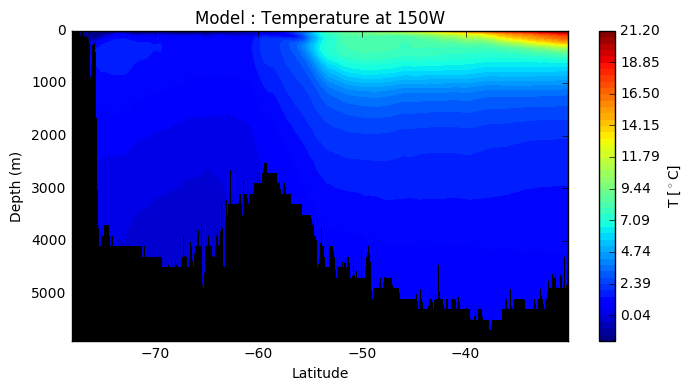

In [49]:
plot_profile(lat, depth, mean_Theta_150W, 'Model : Temperature at 150W', 'T [$^\circ$C]', cmap='jet')

(-1.836644792390544, 21.196126446313976, 3.3790199954315123)


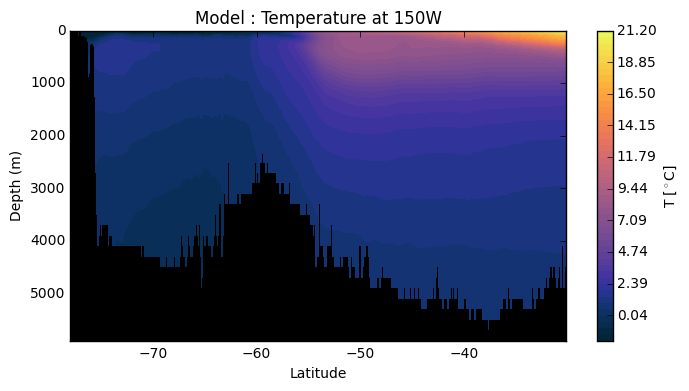

In [20]:
plot_profile(lat, depth, mean_Theta_150W, 'Model : Temperature at 150W', 'T [$^\circ$C]', cmap=cmocean.cm.thermal)

# Temperature at 180W

(-1.8705086829772208, 20.747702515153815, 3.826478285390475)


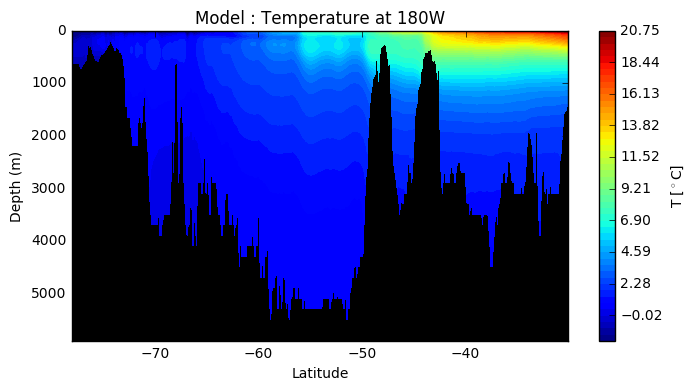

In [50]:
plot_profile(lat, depth, mean_Theta_180W, 'Model : Temperature at 180W', 'T [$^\circ$C]')

(-1.8705086829772208, 20.747702515153815, 3.8264782853904751)


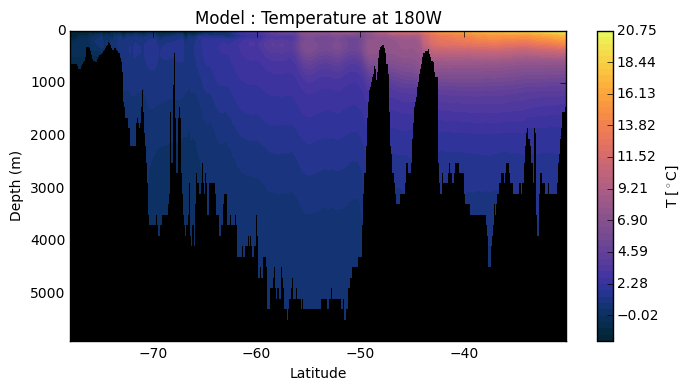

In [21]:
plot_profile(lat, depth, mean_Theta_180W, 'Model : Temperature at 180W', 'T [$^\circ$C]', cmap=cmocean.cm.thermal)

# Salinity at 150W

(32.404384388622681, 35.369597017033428, 34.404479211932021)


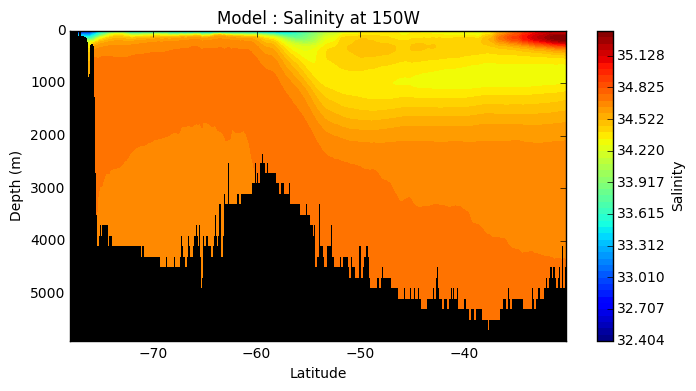

In [34]:
plot_profile(lat, depth, mean_Salt_150W, 'Model : Salinity at 150W', 'Salinity', cmap='jet')

(32.404384388622681, 35.369597017033428, 34.404479211932021)


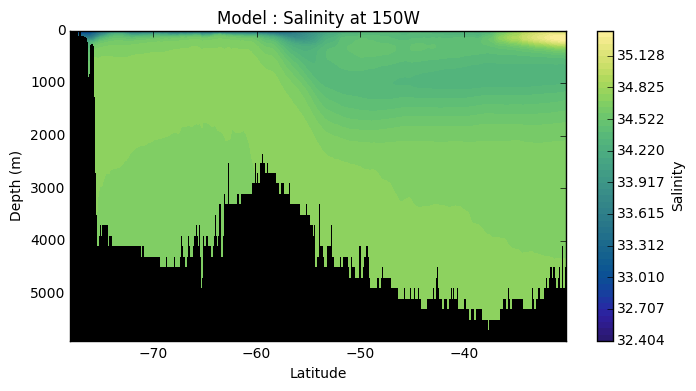

In [22]:
plot_profile(lat, depth, mean_Salt_150W, 'Model : Salinity at 150W', 'Salinity', cmap=cmocean.cm.haline)

# Salinity at 180W

(33.077761930533455, 35.38787169696159, 34.48108398259755)


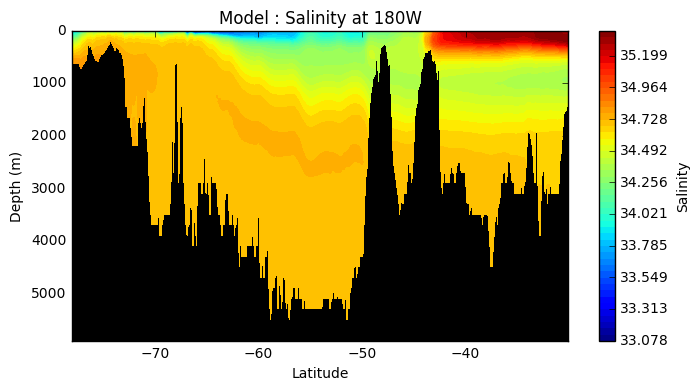

In [52]:
plot_profile(lat, depth, mean_Salt_180W, 'Model : Salinity at 180W', 'Salinity')

(33.077761930533455, 35.387871696961589, 34.481083982597553)


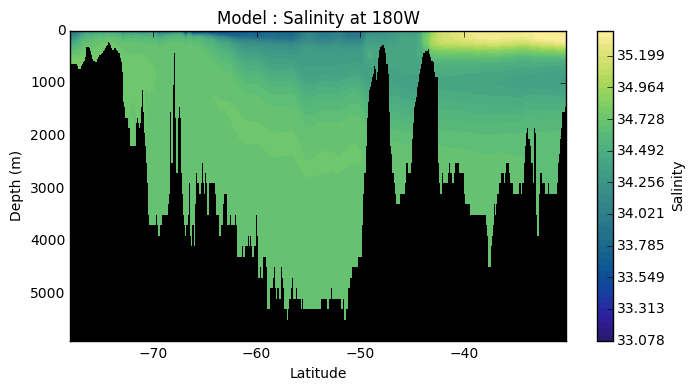

In [24]:
plot_profile(lat, depth, mean_Salt_180W, 'Model : Salinity at 180W', 'Salinity', cmap=cmocean.cm.haline)

### Until 1000 m

(-1.836644792390544, 21.196126446313976, 4.044517150602707)


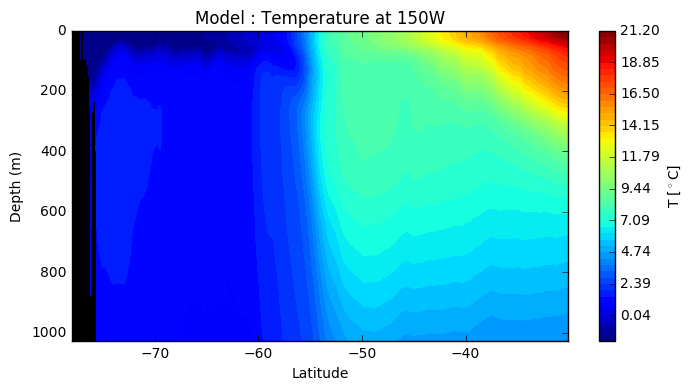

In [57]:
plot_profile(lat, depth[:72], mean_Theta_150W[:72], 'Model : Temperature at 150W', 'T [$^\circ$C]', cmap='jet')

(-1.836644792390544, 21.196126446313976, 4.0445171506027071)


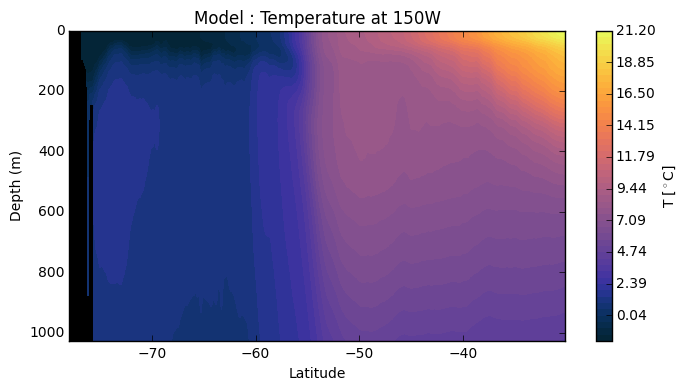

In [25]:
plot_profile(lat, depth[:72], mean_Theta_150W[:72], 'Model : Temperature at 150W', 'T [$^\circ$C]', cmap=cmocean.cm.thermal)

(-1.8705086829772208, 20.747702515153815, 4.293055933268643)


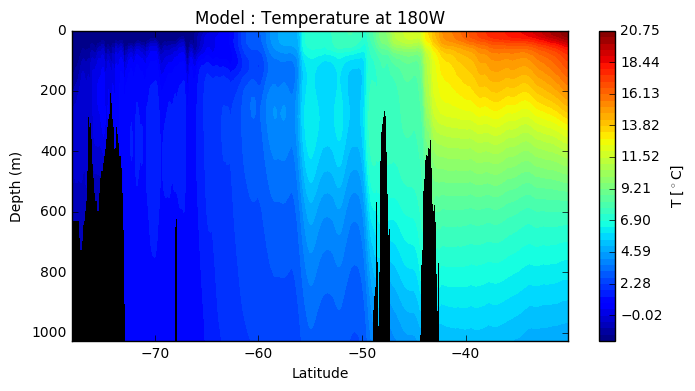

In [58]:
plot_profile(lat, depth[:72], mean_Theta_180W[:72], 'Model : Temperature at 180W', 'T [$^\circ$C]', cmap='jet')

(-1.8705086829772208, 20.747702515153815, 4.2930559332686427)


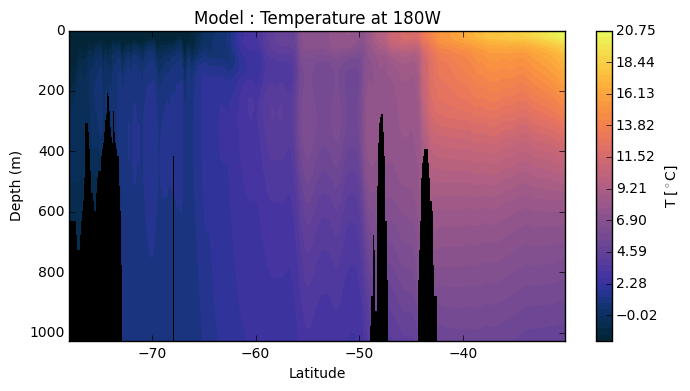

In [26]:
plot_profile(lat, depth[:72], mean_Theta_180W[:72], 'Model : Temperature at 180W', 'T [$^\circ$C]', cmap=cmocean.cm.thermal)

(32.40438438862268, 35.36959701703343, 34.32341703916128)


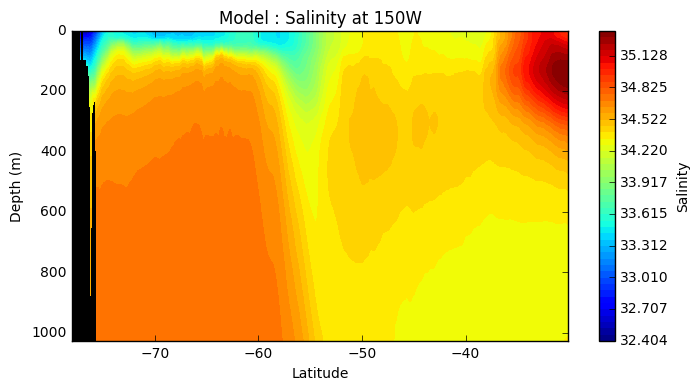

In [55]:
plot_profile(lat, depth[:72], mean_Salt_150W[:72], 'Model : Salinity at 150W', 'Salinity', cmap='jet')

(32.404384388622681, 35.369597017033428, 34.323417039161278)


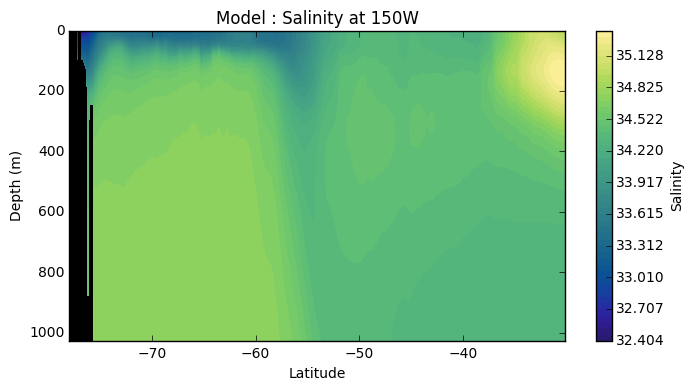

In [27]:
plot_profile(lat, depth[:72], mean_Salt_150W[:72], 'Model : Salinity at 150W', 'Salinity', cmap=cmocean.cm.haline)

(33.077761930533455, 35.387871696961589, 34.442727485751924)


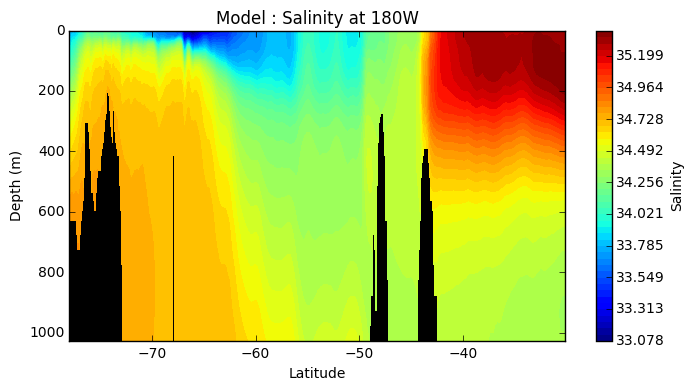

In [29]:
plot_profile(lat, depth[:72], mean_Salt_180W[:72], 'Model : Salinity at 180W', 'Salinity', cmap='jet')

(33.077761930533455, 35.387871696961589, 34.442727485751924)


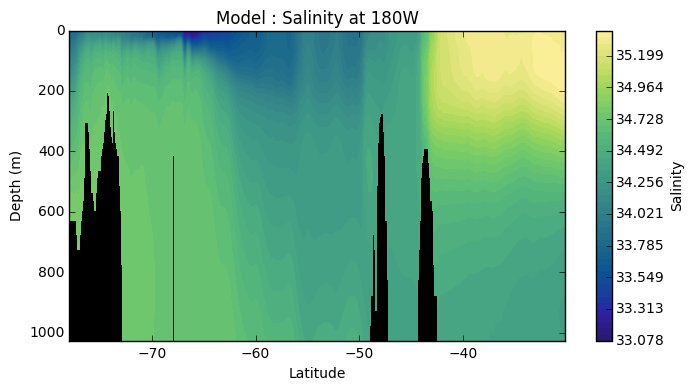

In [28]:
plot_profile(lat, depth[:72], mean_Salt_180W[:72], 'Model : Salinity at 180W', 'Salinity', cmap=cmocean.cm.haline)

***

# Gradients

In [57]:
def grad_model(field, lat, lat_title, lon_title, T_or_S, t_or_s):
    
    field=field[:,lat]
    fig = plt.figure(figsize=(8,4), dpi=300)
    plt.plot(field, depth)
    plt.title('Model : '+ str(T_or_S) + ' profile at lat = '+ str(lat_title) + ' and lon = ' + str(lon_title))#, loc='left')
    plt.xlabel(str(t_or_s))
    plt.ylabel('Depth [m]')
    plt.gca().invert_yaxis() #gca : get current axis

## Temperature

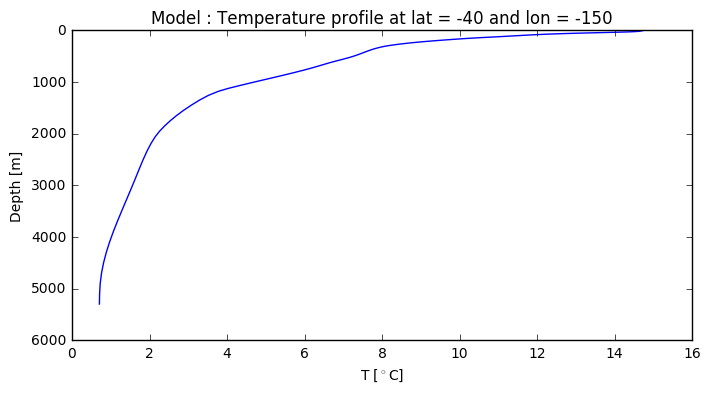

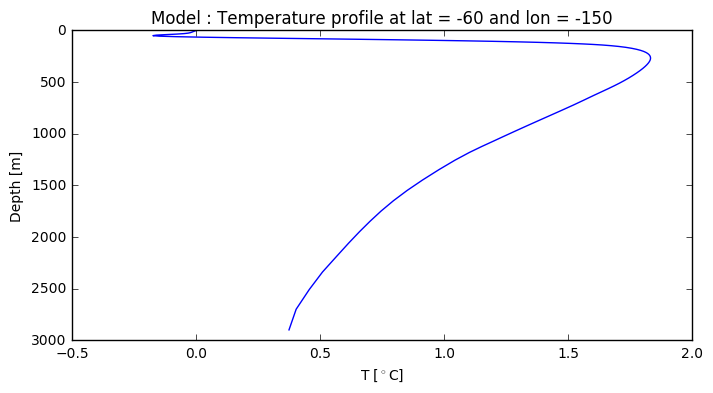

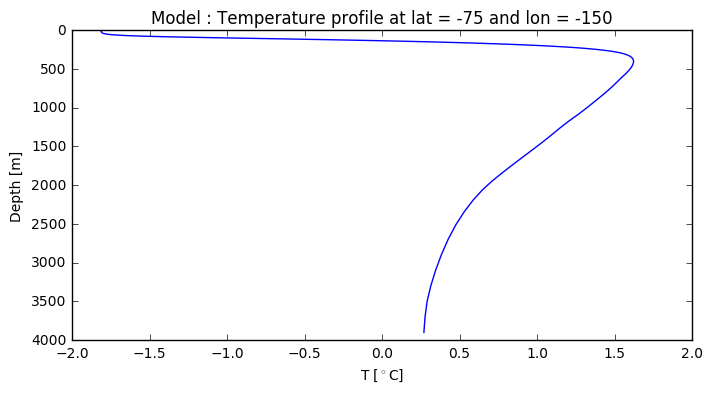

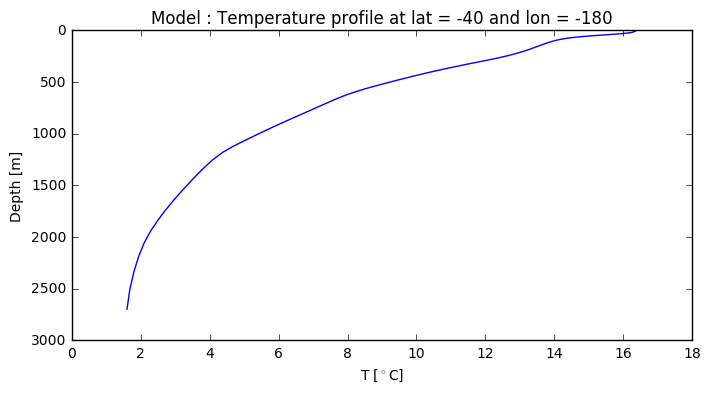

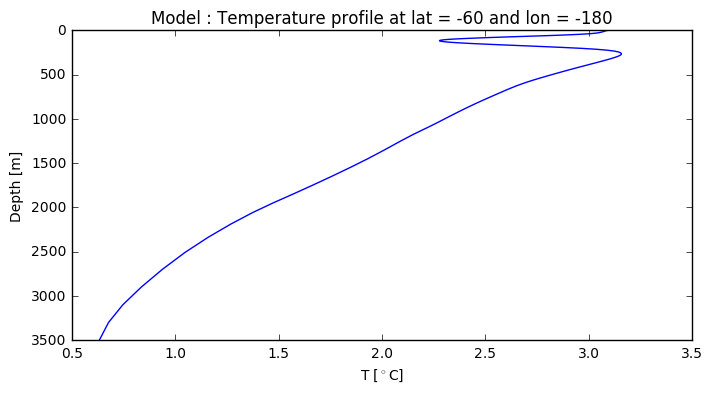

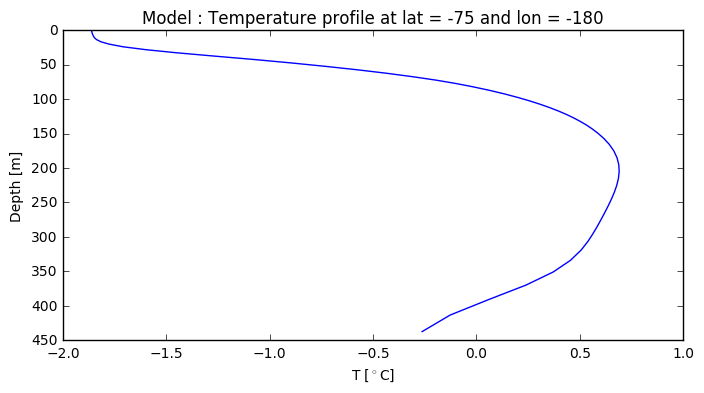

In [61]:
# 150W
grad_model(mean_Theta_150W, 1023, '-40', '-150', 'Temperature', 'T [$^\circ$C]')
grad_model(mean_Theta_150W, 642, '-60',  '-150', 'Temperature', 'T [$^\circ$C]')
grad_model(mean_Theta_150W, 154, '-75',  '-150', 'Temperature', 'T [$^\circ$C]')

# 180W
grad_model(mean_Theta_180W, 1023, '-40', '-180', 'Temperature', 'T [$^\circ$C]')
grad_model(mean_Theta_180W, 642, '-60', '-180', 'Temperature', 'T [$^\circ$C]')
grad_model(mean_Theta_180W, 154, '-75', '-180', 'Temperature', 'T [$^\circ$C]')

## Salinity

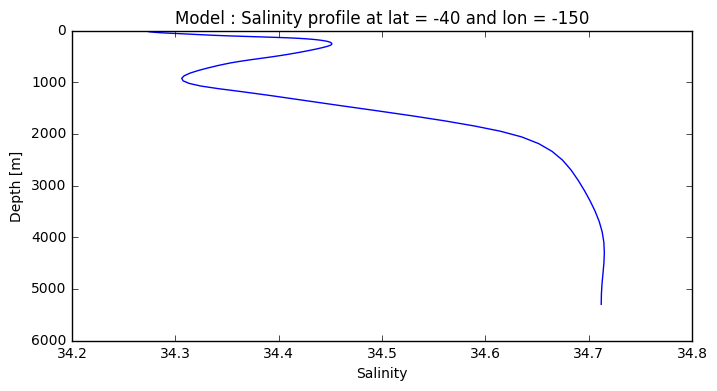

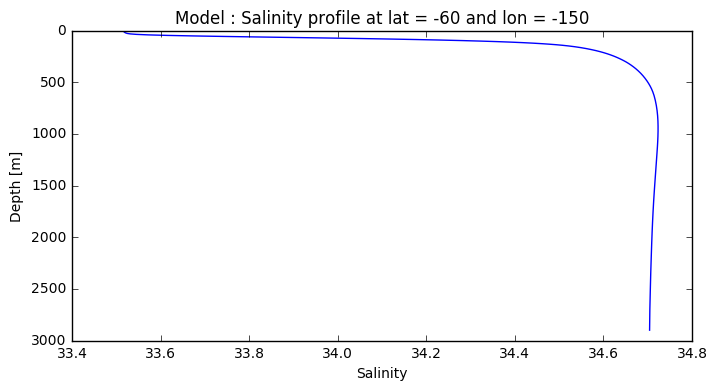

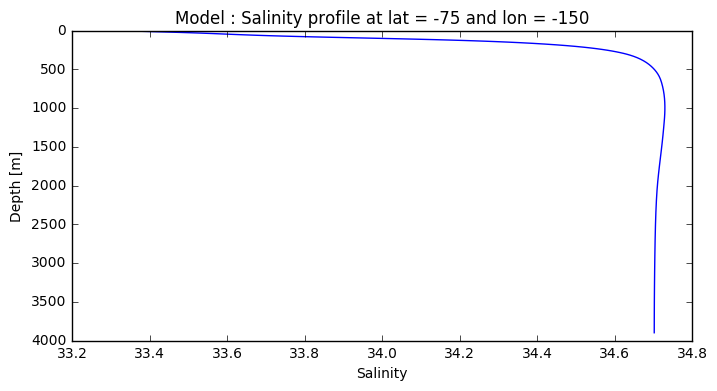

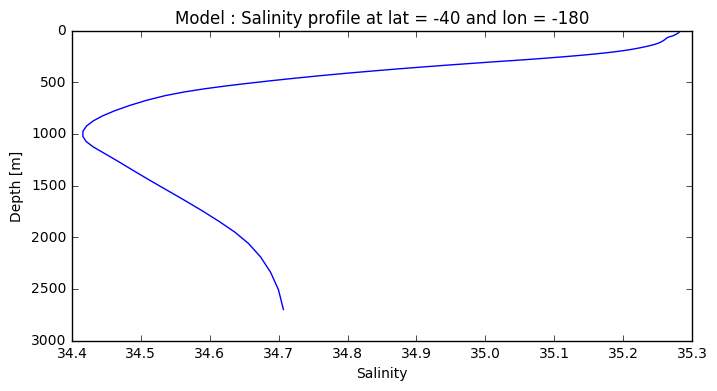

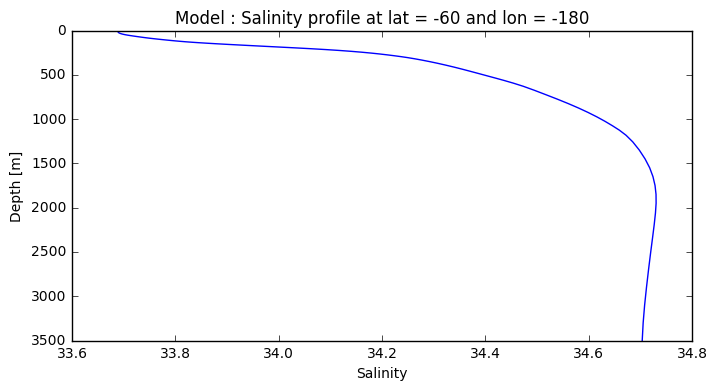

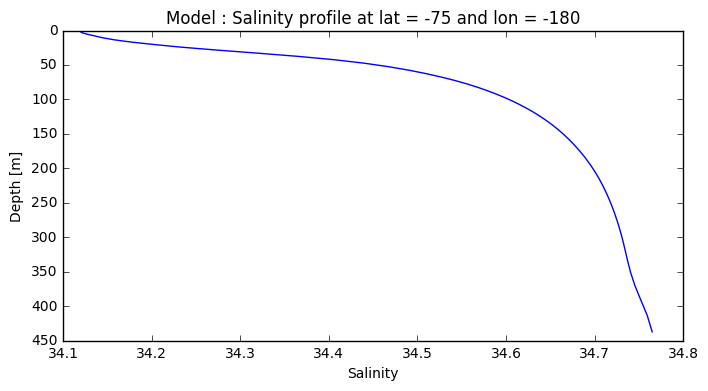

In [62]:
# 150W
grad_model(mean_Salt_150W, 1023, '-40', '-150', 'Salinity', 'Salinity')
grad_model(mean_Salt_150W, 642,  '-60', '-150', 'Salinity', 'Salinity')
grad_model(mean_Salt_150W, 154,  '-75', '-150', 'Salinity', 'Salinity')

# 180W
grad_model(mean_Salt_180W, 1023, '-40', '-180', 'Salinity', 'Salinity')
grad_model(mean_Salt_180W, 642,  '-60', '-180', 'Salinity', 'Salinity')
grad_model(mean_Salt_180W, 154,  '-75', '-180', 'Salinity', 'Salinity')